In [20]:
## Data Loading and Preprocessing

In [16]:
df1 = pd.read_csv("Customer_Feedback_Data.csv")
print("DataFrame 1:")
print(df1.head())

# Load the second CSV file
df2 = pd.read_csv("Product_Offering_Data.csv")
print("\nDataFrame 2:")
print(df2.head())

# Load the third CSV file
df3 = pd.read_csv("Transaction_Data.csv")
print("\nDataFrame 3:")
print(df3.head())

DataFrame 1:
   Customer_ID  Satisfaction_Score  Feedback_Comments  Likelihood_to_Recommend
0            1                10.0     Very satisfied                        9
1            2                 3.0     Very satisfied                        3
2            3                10.0     Very satisfied                        1
3            4                 7.0  Needs improvement                        4
4            5                 8.0     Unsatisfactory                        7

DataFrame 2:
   Product_ID                   Product_Name     Product_Type Risk_Level  \
0           1           Platinum Credit Card      Credit Card     Medium   
1           2           Gold Savings Account  Savings Account        Low   
2           3  High-Yield Investment Account       Investment       High   
3           4                  Mortgage Loan             Loan     Medium   
4           5                      Auto Loan             Loan     Medium   

   Target_Age_Group Target_Income_Group  


In [14]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import numpy as np

# Load the datasets
product_data = pd.read_csv("Product_Offering_Data.csv")
customer_feedback_data = pd.read_csv("Customer_Feedback_Data.csv")

# --- Product Data Preprocessing ---
# Identify object (string) columns
object_cols = product_data.select_dtypes(include='object').columns

# Fill missing values in object columns with "Unknown"
product_data[object_cols] = product_data[object_cols].fillna("Unknown")

# --- Customer Feedback Data Preprocessing ---
# Convert Satisfaction_Score to numeric, handling errors
customer_feedback_data['Satisfaction_Score'] = pd.to_numeric(customer_feedback_data['Satisfaction_Score'], errors='coerce')

# Handle missing values in numerical columns (Satisfaction_Score and Likelihood_to_Recommend)
numerical_cols = ['Satisfaction_Score', 'Likelihood_to_Recommend']
imputer = SimpleImputer(strategy='mean')  # Impute with mean
customer_feedback_data[numerical_cols] = imputer.fit_transform(customer_feedback_data[numerical_cols])

# Outlier Handling for Satisfaction_Score using IQR
Q1 = customer_feedback_data['Satisfaction_Score'].quantile(0.25)
Q3 = customer_feedback_data['Satisfaction_Score'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replace outliers with the calculated bounds
customer_feedback_data['Satisfaction_Score'] = np.where(
    customer_feedback_data['Satisfaction_Score'] < lower_bound, lower_bound,
    customer_feedback_data['Satisfaction_Score']
)
customer_feedback_data['Satisfaction_Score'] = np.where(
    customer_feedback_data['Satisfaction_Score'] > upper_bound, upper_bound,
    customer_feedback_data['Satisfaction_Score']
)

# Standardize numerical features
scaler = StandardScaler()
customer_feedback_data[numerical_cols] = scaler.fit_transform(customer_feedback_data[numerical_cols])

print("Product Data:")
print(product_data.head())
print("\nCustomer Feedback Data:")
print(customer_feedback_data.head())


Product Data:
   Product_ID                   Product_Name     Product_Type Risk_Level  \
0           1           Platinum Credit Card      Credit Card     Medium   
1           2           Gold Savings Account  Savings Account        Low   
2           3  High-Yield Investment Account       Investment       High   
3           4                  Mortgage Loan             Loan     Medium   
4           5                      Auto Loan             Loan     Medium   

   Target_Age_Group Target_Income_Group  
0               NaN              Medium  
1               NaN                 Low  
2               NaN                High  
3               NaN                High  
4               NaN              Medium  

Customer Feedback Data:
   Customer_ID  Satisfaction_Score  Feedback_Comments  Likelihood_to_Recommend
0            1            1.550466     Very satisfied                 1.193720
1            2           -0.919537     Very satisfied                -0.895204
2            3 

In [22]:
## Feature Engineering

In [10]:
# Create an engagement score
customer_feedback_data['Engagement_Score'] = (
    customer_feedback_data['Satisfaction_Score'] + customer_feedback_data['Likelihood_to_Recommend']
) / 2

print(customer_feedback_data.head())


   Customer_ID  Satisfaction_Score  Feedback_Comments  \
0            1            1.550466     Very satisfied   
1            2           -0.919537     Very satisfied   
2            3            1.550466     Very satisfied   
3            4            0.491893  Needs improvement   
4            5            0.844751     Unsatisfactory   

   Likelihood_to_Recommend  Engagement_Score  
0                 1.193720          1.372093  
1                -0.895204         -0.907370  
2                -1.591511         -0.020523  
3                -0.547050         -0.027578  
4                 0.497412          0.671081  


In [24]:
## Clustering Let's use K-Means clustering

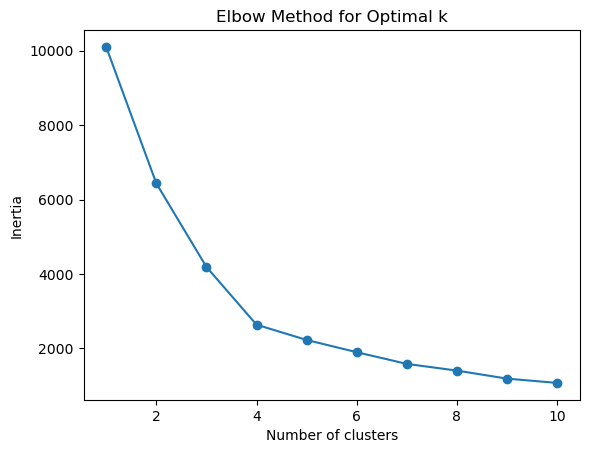

   Customer_ID  Satisfaction_Score  Feedback_Comments  \
0            1            1.550466     Very satisfied   
1            2           -0.919537     Very satisfied   
2            3            1.550466     Very satisfied   
3            4            0.491893  Needs improvement   
4            5            0.844751     Unsatisfactory   

   Likelihood_to_Recommend  Cluster  
0                 1.193720        1  
1                -0.895204        2  
2                -1.591511        2  
3                -0.547050        2  
4                 0.497412        1  


In [26]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Selecting features for clustering
X = customer_feedback_data[['Satisfaction_Score', 'Likelihood_to_Recommend']]

# Determine the optimal number of clusters using the Elbow Method
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42,n_init='auto')
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

# Based on the elbow plot, choose an optimal number of clusters (e.g., 3 or 4)
n_clusters = 3

# Apply K-Means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42,n_init='auto')
customer_feedback_data['Cluster'] = kmeans.fit_predict(X)

print(customer_feedback_data.head())


In [28]:
## Segmentation and Analysis

   Cluster  Satisfaction_Score  Likelihood_to_Recommend  \
0        0                 4.5                      4.5   
1        1                 2.5                      2.5   
2        2                 4.5                      4.5   

   Engagement_Score_Renamed  
0                       2.5  
1                       4.5  
2                       2.5  


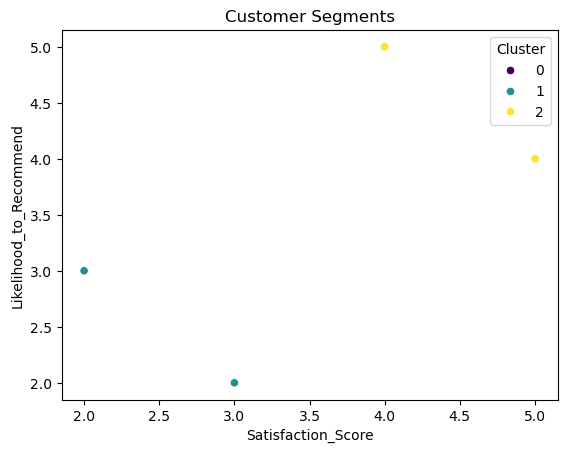

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming customer_feedback_data is a pandas DataFrame
# Example DataFrame (replace with your actual data)
customer_feedback_data = pd.DataFrame({
    'Cluster': [0, 0, 1, 1, 2, 2],
    'Satisfaction_Score': [4, 5, 2, 3, 5, 4],
    'Likelihood_to_Recommend': [5, 4, 3, 2, 4, 5],
    'Engagement_Score_Renamed': [3, 2, 4, 5, 2, 3]  # Renamed column
})

# Aggregate the mean values of each cluster
cluster_summary = customer_feedback_data.groupby('Cluster').agg({
    'Satisfaction_Score': 'mean',
    'Likelihood_to_Recommend': 'mean',
    'Engagement_Score_Renamed': 'mean'  # Use the correct column name
}).reset_index()

print(cluster_summary)

# Visualizing the clusters
sns.scatterplot(data=customer_feedback_data, x='Satisfaction_Score', y='Likelihood_to_Recommend', hue='Cluster', palette='viridis')
plt.title('Customer Segments')
plt.show()


In [34]:
## Interpretation and Recommendations

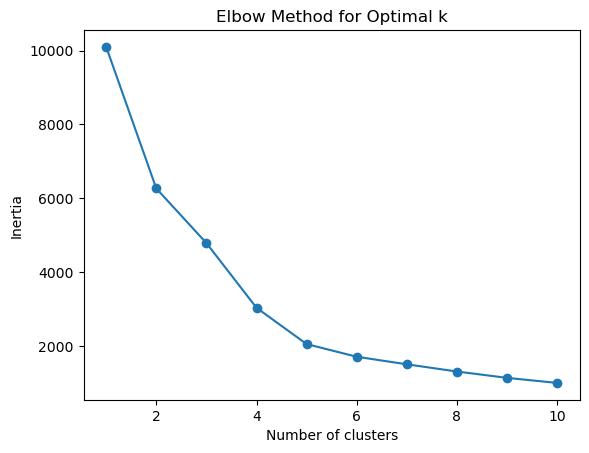

Cluster Summary:
   Cluster  Satisfaction_Score  Likelihood_to_Recommend  Engagement_Score
0        0           -0.744542                -0.622883         -0.683712
1        1            0.798017                -0.824611         -0.013297
2        2            0.022020                 0.979709          0.500865


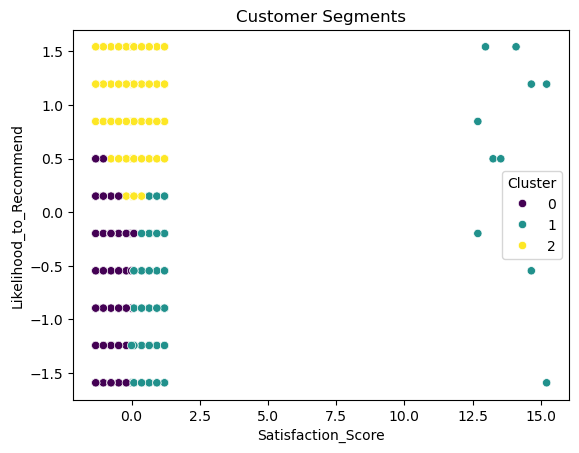

In [38]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
import numpy as np

# Load the datasets
product_data = pd.read_csv("Product_Offering_Data.csv")
customer_feedback_data = pd.read_csv("Customer_Feedback_Data.csv")

# --- Product Data Preprocessing ---
# Identify object (string) columns to fill with "Unknown"
object_cols = product_data.select_dtypes(include='object').columns

# Fill missing values in object columns with "Unknown"
product_data[object_cols] = product_data[object_cols].fillna("Unknown")

# --- Customer Feedback Data Preprocessing ---
# Convert Satisfaction_Score and Likelihood_to_Recommend to numeric, handling errors
customer_feedback_data['Satisfaction_Score'] = pd.to_numeric(customer_feedback_data['Satisfaction_Score'], errors='coerce')
customer_feedback_data['Likelihood_to_Recommend'] = pd.to_numeric(customer_feedback_data['Likelihood_to_Recommend'], errors='coerce')

# Handle missing values in numerical columns (Satisfaction_Score and Likelihood_to_Recommend)
numerical_cols = ['Satisfaction_Score', 'Likelihood_to_Recommend']
imputer = SimpleImputer(strategy='mean')  # Impute with mean
customer_feedback_data[numerical_cols] = imputer.fit_transform(customer_feedback_data[numerical_cols])

# Standardize numerical features
scaler = StandardScaler()
customer_feedback_data[numerical_cols] = scaler.fit_transform(customer_feedback_data[numerical_cols])

# Feature Engineering (Optional)
customer_feedback_data['Engagement_Score'] = (
    customer_feedback_data['Satisfaction_Score'] + customer_feedback_data['Likelihood_to_Recommend']
) / 2

# Clustering
X = customer_feedback_data[['Satisfaction_Score', 'Likelihood_to_Recommend']]

# Determine the optimal number of clusters using the Elbow Method
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init='auto')  # Specify n_init
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

# Based on the elbow plot, choose an optimal number of clusters (e.g., 3 or 4)
n_clusters = 3

# Apply K-Means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto')  # Specify n_init
customer_feedback_data['Cluster'] = kmeans.fit_predict(X)

# Segmentation and Analysis
cluster_summary = customer_feedback_data.groupby('Cluster').agg({
    'Satisfaction_Score': 'mean',
    'Likelihood_to_Recommend': 'mean',
    'Engagement_Score': 'mean'
}).reset_index()

print("Cluster Summary:")
print(cluster_summary)

# Visualizing the clusters
sns.scatterplot(data=customer_feedback_data, x='Satisfaction_Score', y='Likelihood_to_Recommend', hue='Cluster', palette='viridis')
plt.title('Customer Segments')
plt.show()
